# **ETL.ipynb**

## Objectives

* "Fetch data from Kaggle and save as raw data", 
NB I have downloaded the datasets as a zip file, extracted and saved them in Windows Explorer for now, will add this extraction step later if required and I have time.

* Read and summarise, analyse and visualise datasets.

## Inputs

* 
Kaggle website 
https://www.kaggle.com/datasets/manjeetsingh/retaildataset
Zip folder containing

<sales data-set.csv>
<Features data set.csv>
<stores data-set.csv>

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* I will store the notebooks in a subfolder, therefore when running the notebook in the editor, I need to change the working directory

* Access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\jerem\\OneDrive\\Documents\\CodeInstitute\\vscode-projects\\ifp-retailanalysis\\jupyter_notebooks'

Make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\jerem\\OneDrive\\Documents\\CodeInstitute\\vscode-projects\\ifp-retailanalysis'

# Section 1

## Import necessary Python libraries, read raw datasets into Pandas dataframes and inspect summary data.

Note I downloaded the csv files as a zip file from Kaggle, unzipped the archive on my downloads folder, renamed the files replacing spaces with underscores, dragged them from my downloads extract folder saved the datasets.  I do not know how to import them directly from the Kaggle website and unzip the archive, either with code here or in the vscode terminal but would seek to learn and do this if possible to ensure no corruption of datasets or if downloading to Windows vs vscode causes any auto reformating of dates from US to UK format.

In [4]:
# import all necessary Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.pipeline import Pipeline

In [5]:
#reset display max rows and columns to default after expanding below for readability and to limit file size
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [6]:
#read sales, Features and Store datasets into aptly named pandas dataframes and summarise
 
# I attempted to read from zip in case it affects date format but was not possible
# df_sales=pd.read_csv('Dataset/Raw/archive.zip/sales data-set.csv')

df_sales=pd.read_csv('Dataset/Raw/sales_data-set.csv')
print(f'<sales_data-set.csv> read into data frame "df_sales"\n')
print(f'{df_sales}\n')
print(f'{df_sales.info()}\n\n')

df_features=pd.read_csv('Dataset/Raw/Features_data set.csv')
print(f'<Features data_set.csv> read into data frame "df_features"\n')
print(f'{df_features}\n')
print(f'{df_features.info()}\n\n')

df_stores=pd.read_csv('Dataset/Raw/stores_data-set.csv')
print(f'<stores_data-set.csv> read into data frame "df_stores"\n')
print(f'{df_stores}\n')
print(f'{df_stores.info()}\n')

<sales_data-set.csv> read into data frame "df_sales"

        Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1  05/02/2010      24924.50      False
1           1     1  12/02/2010      46039.49       True
2           1     1  19/02/2010      41595.55      False
3           1     1  26/02/2010      19403.54      False
4           1     1  05/03/2010      21827.90      False
...       ...   ...         ...           ...        ...
421565     45    98  28/09/2012        508.37      False
421566     45    98  05/10/2012        628.10      False
421567     45    98  12/10/2012       1061.02      False
421568     45    98  19/10/2012        760.01      False
421569     45    98  26/10/2012       1076.80      False

[421570 rows x 5 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  

My initial observations. 

1. The sales dataset is by far the largest with, for each store and each department within, on dates apparently from 5th Feb 2010 to 26th Oct 2012 (TBC by date formatting and sorting) The dates seen in the head and tail are clearly in UK date format dd/mm/yyyy which surprised me this being a USA dataset.

Start date is in line with the Kaggle data source description 'Historical sales data, which covers to 2010-02-05 to 2012-11-01' but but end date is slightly earlier possibly due to dates not being sorted correctly., weekly sales data and whether each date is a holiday.  

The there is no missing data.

There are no units in the column headings so it's not immediately clear what the weekly_sales represent.  At this stage I will assume these are the total amounts in US dollars as the description of holidays in the Kaggle dataset implies this is a USA business.

2. The Features dataset is considerably smaller being only by store not department.  Like the sales data, it appears to have weekly information starting 5th Feb 2010 but for a longer date range to 26th Jul 2013, and whether each date is a holiday.  
But unlike the sales data, it has additonal data on Markdowns 1-5, temperature, fuel price, CPI and unemployment.

Again, The dates seen in the head and tail are clearly in UK date format dd/mm/yyyy which surprised me this being a USA dataset.

There is a considerable amount of missing data including Markdown data for almost half the rows. The Kaggle source states that 'MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA'

This is not visible in the truncated summaries above but will be confirmed in the analysis below. 

There are no units in the column headings so it's not immediately clear what the numbers in the Markdown columns represent.  At this stage I will assume these are the total amounts in US dollars as with weekly_sales as they seem mostly too large to be percentages.

Regarding dates, as in section 1 I downloaded the dataset as a zip archive from Kaggle, renamed replacing spaces with underscores and dragged the files into the vscode Datasets/Raw folder (all without opening in Excel or any other software).  However I am unsure if downloading and extracting on my UK computer or possibly vscode settings could have still somehow reformatted dates to UK format if they were in US format.  The dates in the sales and features datasets appeared to me of mixed format so converting using the datetime format with the datefirst=True argument is risky so I would need to inspect dates not already in a date format to check.

3. The sales dataset is relatively small just listing the store type (a letter) and size (an integer) for each of the 45 stores.

There is no missing data.

Again no units for size so no idea if this is annual turnover or square footage etc.  I'd guess the former it has a close correlation with sales. 

In order to better understand the datasets from the outset, would normally request information on the units from the generator of the datasets but in this project that is not possible.

---

# Section 2 Initial visualisations and transformations

## Section 2.1 tabulate and assess correlation of total sales vs store size by store type.

In [7]:
#Create copy of df_stores called df_stores_T, aggregate total sales by store 
# from sales dataset and add column to df_stores_T.
df_stores_T = df_stores.copy()
df_stores_T['totalsales_millions'] = (
    df_sales.groupby('Store')['Weekly_Sales'].sum()/1000000
    )
print(df_stores_T.sort_values(by='totalsales_millions', ascending=False))

    Store Type    Size  totalsales_millions
20     21    B  140167           301.397792
4       5    B   34875           299.543953
14     15    B  123737           288.999911
13     14    A  200898           286.517704
2       3    B   37392           275.382441
10     11    A  207499           271.617714
27     28    A  206302           253.855917
6       7    B   70713           223.756131
1       2    A  202307           222.402809
39     40    A  155083           207.445542
19     20    A  203742           206.634862
31     32    A  203007           199.613905
23     24    A  203819           198.750618
24     25    B  128107           194.016021
11     12    B  112238           193.962787
28     29    B   93638           189.263681
41     42    C   39690           181.341935
32     33    A   39690           166.819246
18     19    A  203819           155.114734
22     23    B  114533           147.075649
12     13    A  219622           144.287230
26     27    A  204184          

Hindsight:-I should have checked weekly_sales data date counts for each store to check for consistency.  I did do later and found some small discrepancies which seem very unlikely to materially change lack of correlation found below, but I would take account of this here if revising.

---

In [8]:
#Grouped store type count, mean and total Size and total sales.
#Correlation matrices for sales vs size for each store type.
print(df_stores_T.drop(columns=['Store']).groupby("Type").agg(['count', 'mean', 'median', 'sum']).round(1))
print()
types= df_stores["Type"].unique()
for t in types:
    print()
    print(f'Correlation matrix for store type {t}:')
    print(df_stores_T[df_stores_T["Type"] == t].drop(columns=['Type','Store']).corr())


      Size                              totalsales_millions                \
     count      mean    median      sum               count   mean median   
Type                                                                        
A       22  177247.7  202406.0  3899450                  21  150.8  144.3   
B       17  101190.7  114533.0  1720242                  17  170.7  147.1   
C        6   40541.7   39910.0   243250                   6   92.7   78.4   

              
         sum  
Type          
A     3166.6  
B     2902.0  
C      556.2  


Correlation matrix for store type A:
                         Size  totalsales_millions
Size                 1.000000             0.141003
totalsales_millions  0.141003             1.000000

Correlation matrix for store type B:
                         Size  totalsales_millions
Size                 1.000000            -0.273291
totalsales_millions -0.273291             1.000000

Correlation matrix for store type C:
                         S

From the above, there does not appear to be any very significant grouping of sales amongst any particular group of stores which the business should focus on. 

Store type A has the largest store count, mean and total sales, followed by type B with type C being the fewest and smallest.

There is no strong correlation between store size and sales and in fact this is negative for store types B and C which seems counterintuitive indicating other factors more strongly affect sales.

Section 2.12 join sales and Features datasets together.

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

## Section 2.2 Reformat sales and Features dataframe date columns to datetime format and merge datasets

In [9]:
df_sales_T=df_sales.copy()
df_sales_T['Date'] = pd.to_datetime(df_sales_T['Date'], errors='raise', dayfirst='True', format='mixed')
# df_sales['Date'] = pd.to_datetime(df_sales['Date'], errors='raise', dayfirst='False')
df_sales_T = df_sales_T.sort_values(by=['Date','Store', 'Dept'])
df_sales_T

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
143,1,2,2010-02-05,50605.27,False
286,1,3,2010-02-05,13740.12,False
429,1,4,2010-02-05,39954.04,False
572,1,5,2010-02-05,32229.38,False
...,...,...,...,...,...
421012,45,93,2012-10-26,2487.80,False
421146,45,94,2012-10-26,5203.31,False
421289,45,95,2012-10-26,56017.47,False
421434,45,97,2012-10-26,6817.48,False


In converting the date formats in the sales and features dataframes with the pd.dateformat function, I used the errors='raise', dayfirst=True, format='mixed' arguments.  The format='mixed' argument was necessary, without which the code generated errors, presumably due to formatting inconsistencies in the raw data.  I assume all dates not already in obvious date format have day first as seems to be the case with the first and last few rows.  But I need to double check this later.

According to the pandas documentation for the datetime function currently at
https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

the “mixed” argument is 'used to infer the format for each element individually. This is risky, and you should probably use it along with dayfirst.'  I assumed = False as this is a USA dataset so any date strings are likely to state month number before day number.

In [10]:
#check unique dtypes for Date column
element_types = df_sales['Date'].apply(type).unique()
print (element_types)

[<class 'str'>]


All dates are strings but I know from datetime reformatting above that not all are properly formatted so type='Mixed' is required when using dateformat function as explained above.  I don't know how to check which rows contain strings where date may be ambiguous.  Need to learn this later to find such rows and check dates properly converted.

Same issue with original features dataframe.

In [11]:
#check unique dtypes for Date column
element_types = df_features['Date'].apply(type).unique()
print (element_types)

[<class 'str'>]


In [12]:
df_features_T=df_features.copy()
df_features_T['Date'] = pd.to_datetime(df_features_T['Date'], errors='raise', dayfirst='True', format='mixed')
df_features_T = df_features_T.sort_values(by=['Date'])
df_features_T

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2730,16,2010-02-05,19.79,2.580,NaN,NaN,NaN,NaN,NaN,189.381697,7.039,False
5460,31,2010-02-05,39.05,2.572,NaN,NaN,NaN,NaN,NaN,210.752605,8.324,False
3640,21,2010-02-05,39.05,2.572,NaN,NaN,NaN,NaN,NaN,210.752605,8.324,False
4550,26,2010-02-05,9.55,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,8.488,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5823,32,2013-07-26,72.99,3.582,549.89,940.93,86.00,106.47,1530.56,NaN,NaN,False
2365,13,2013-07-26,83.62,3.669,346.31,1377.41,93.40,140.32,2147.06,NaN,NaN,False
5641,31,2013-07-26,85.00,3.620,1394.82,138.71,12.00,970.77,6859.07,NaN,NaN,False
6733,37,2013-07-26,83.28,3.620,178.00,11.86,NaN,NaN,779.32,NaN,NaN,False


## Find and inspect dates which were in different formats in raw sales and Features datasets to ensure they converted to correct date when I have time!

In [13]:
#look at markdown basic statistics to try to understand what they mean  Are these percentages or absolute reductions?
df_features_T[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].describe()

,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
count,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000
mean,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422
std,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278
min,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000
25%,1577.532500,68.880000,6.600000,304.687500,1440.827500
50%,4743.580000,364.570000,36.260000,1176.425000,2727.135000
75%,8923.310000,2153.350000,163.150000,3310.007500,4832.555000
max,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000


In [14]:
#read and view features file to try to understand what Markdown columns mean

pd.set_option('display.max_rows', 1000) # to read the whole output.  Should reset in next line.
# ,1000 used rather than ,None to limit dangerously large display generation elsewhere and 
# file size if not reset.

df_features_T['Year'] =df_features_T['Date'].dt.year
df_features_T['Monthno'] =df_features_T['Date'].dt.month
df_features_T['MarkDownOn']=((df_features_T['MarkDown1'] > 0) | (df_features_T['MarkDown2'] > 0) | (df_features_T['MarkDown3'] > 0) | (df_features_T['MarkDown4'] > 0) | (df_features_T['MarkDown5'] > 0))
print(df_features_T.groupby(['Year', 'Monthno', 'MarkDownOn','IsHoliday']).size())

# According to the summary below, there is only data for at least one of the 
# 5 MarkDown columns from Nov 2011 onwards  this is in line with the Kaggle sourcepage which said 
# there was in fact no markdown data until Nov 2011.

Year  Monthno  MarkDownOn  IsHoliday
2010  2        False       False        135
                           True          45
      3        False       False        180
      4        False       False        225
      5        False       False        180
      6        False       False        180
      7        False       False        225
      8        False       False        180
      9        False       False        135
                           True          45
      10       False       False        225
      11       False       False        135
                           True          45
      12       False       False        180
                           True          45
2011  1        False       False        180
      2        False       False        135
                           True          45
      3        False       False        180
      4        False       False        225
      5        False       False        180
      6        False       False       

I observe:-
Holiday periods are all in Feb, Sep, Nov and Dec of each year in the dataset.
Non Null Markdown data begins in Nov 2011 which is consistent with Kaggle description.
Many markdowns are outside holiday periods so conclude this relationship is unreliable.

It is possible that many of the nulls in the MarkDown columns were in weeks when there was no markdown. 

To try to assess thisif this is a reasonable assumption, I researched information on when the timings of the four national holiday periods mentioned in the Kaggle datasource website in an attempt to understand when I might expect these markdowns to typically occur as the Kaggle description implies most are on or leading up to these holidays. However the dataset has markdown data throughout the year so this information may be irrelevant but retained in case useful for revision:-

Note also, later in the process below I tested my hypothesis that Markdown is in fact =0 where the data is null, replacing all nulls withy zeros, and the impact on the correlation of sales vs each MarkDown and found this assumption makes little difference, the correlation is still very weak.


Researched information on the US holidas mentioned in Kaggle datasource website:-

According to the data source.
https://www.kaggle.com/datasets/manjeetsingh/retaildataset

'The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.'

So the main 4 holiday periods are Super Bowl, Labor Day, Thanksgiving and Christmas

According to Wikipedia
https://en.wikipedia.org/wiki/Super_Bowl

'Since 2022, the game has been played on the second Sunday in February. Prior Super Bowls were played on Sundays in early to mid-January from 1967 to 1978, late January from 1979 to 2003,[a] and the first Sunday of February from 2004 to 2021.'

So would have been 1st Sun in Feb in all time periods above.

According to Wikipedia
https://en.wikipedia.org/wiki/Labor_Day

'Labor Day is a federal holiday in the United States celebrated on the first Monday of September'

According to a CoPilot search asking 
'When is thanksgiving celebrated in the USA?'
https://www.bing.com/search?q=When%20is%20thanksgiving%20celebrated%20in%20the%20USA%3F&qs=n&form=QBRE&sp=-1&ghc=1&lq=0&pq=when%20is%20thanksgiving%20celebrated%20in%20the%20usa%3F&sc=19-43&sk=&cvid=A45308B981654BBCB1DA8924DA4332B2

In [15]:
#reset display max rows to default after expanding above for readability and to limit file size
pd.reset_option('display.max_rows')

# Section 2.3 Merge sales and features datasets

In [16]:
#merge sales and features datasets outer join on Store and Data
# takes about 1min to run try not to run unless necessary
df_salesfeaturesmerged = (pd.merge(df_sales_T, df_features_T, how='outer', on=['Store', 'Date'])
                          .sort_values(by=['Date', 'Store', 'Dept'])
                            )
print(df_salesfeaturesmerged)

        Store  Dept       Date  Weekly_Sales IsHoliday_x  Temperature  \
0           1   1.0 2010-02-05      24924.50       False        42.31   
1           1   2.0 2010-02-05      50605.27       False        42.31   
2           1   3.0 2010-02-05      13740.12       False        42.31   
3           1   4.0 2010-02-05      39954.04       False        42.31   
4           1   5.0 2010-02-05      32229.38       False        42.31   
...       ...   ...        ...           ...         ...          ...   
423302     41   NaN 2013-07-26           NaN         NaN        67.56   
423300     42   NaN 2013-07-26           NaN         NaN        83.32   
423298     43   NaN 2013-07-26           NaN         NaN        79.13   
423294     44   NaN 2013-07-26           NaN         NaN        83.62   
423324     45   NaN 2013-07-26           NaN         NaN        76.06   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.572        NaN        NaN      

I have merged with sales and features tables left and right. Merging with sales and features tables right and left produces same number of rows as I would have expected.

As a check I have enumerated the non null counts for the merged dataset sales and MarkDown columns.  I see again the non null data is in line with observations above with Markdown data from Nov 2011 onwards but also that the monthly non null counts are significantly lower from Nov 2012.

In [45]:
print((df_salesfeaturesmerged[['Year','Monthno','Weekly_Sales',
'MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].groupby(['Year', 'Monthno']).count())
)

              Weekly_Sales  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
Year Monthno                                                             
2010 2               11839          0          0          0          0   
     3               11788          0          0          0          0   
     4               14697          0          0          0          0   
     5               11672          0          0          0          0   
     6               11661          0          0          0          0   
     7               14561          0          0          0          0   
     8               11603          0          0          0          0   
     9               11724          0          0          0          0   
     10              14667          0          0          0          0   
     11              11712          0          0          0          0   
     12              14755          0          0          0          0   
2011 1               11695          0 

In [18]:
#Correlation matrices for total sales vs other numerical values in features dataset in each year

years= df_salesfeaturesmerged['Year'].unique()
print (years)
for y in years:

    print()
    print(f'Sales v features correlation matrix for {y}:')
    
    correlationmatrix1=(df_salesfeaturesmerged[df_salesfeaturesmerged['Year'] == y]
                        .drop(columns=['Date','Monthno', 'Store', 'Dept', 'MarkDownOn']).corr()
                        )
    print(correlationmatrix1)

[2010 2011 2012 2013]

Sales v features correlation matrix for 2010:
              Weekly_Sales  IsHoliday_x  Temperature  Fuel_Price  MarkDown1  \
Weekly_Sales      1.000000     0.009637    -0.015941    0.049616        NaN   
IsHoliday_x       0.009637     1.000000    -0.209457    0.042079        NaN   
Temperature      -0.015941    -0.209457     1.000000   -0.170057        NaN   
Fuel_Price        0.049616     0.042079    -0.170057    1.000000        NaN   
MarkDown1              NaN          NaN          NaN         NaN        NaN   
MarkDown2              NaN          NaN          NaN         NaN        NaN   
MarkDown3              NaN          NaN          NaN         NaN        NaN   
MarkDown4              NaN          NaN          NaN         NaN        NaN   
MarkDown5              NaN          NaN          NaN         NaN        NaN   
CPI              -0.024879     0.001149     0.155282   -0.586773        NaN   
Unemployment     -0.015378     0.001209     0.152018    0.3906

In [19]:
#correlation of sales vs Markdowns only
    
years= df_salesfeaturesmerged['Year'].unique()
print (years)
for y in years:

    print()
    print(f'Sales v MarkDowns correlation matrix for {y}:')
    
    select_df=df_salesfeaturesmerged[df_salesfeaturesmerged['Year'] == y][
    ['Weekly_Sales', 'MarkDown1', 'MarkDown2','MarkDown3','MarkDown4','MarkDown5']
        ]
    SalesvMarkDown_correlation1=select_df.corr()
    print(SalesvMarkDown_correlation1)

[2010 2011 2012 2013]

Sales v MarkDowns correlation matrix for 2010:
              Weekly_Sales  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
Weekly_Sales           1.0        NaN        NaN        NaN        NaN   
MarkDown1              NaN        NaN        NaN        NaN        NaN   
MarkDown2              NaN        NaN        NaN        NaN        NaN   
MarkDown3              NaN        NaN        NaN        NaN        NaN   
MarkDown4              NaN        NaN        NaN        NaN        NaN   
MarkDown5              NaN        NaN        NaN        NaN        NaN   

              MarkDown5  
Weekly_Sales        NaN  
MarkDown1           NaN  
MarkDown2           NaN  
MarkDown3           NaN  
MarkDown4           NaN  
MarkDown5           NaN  

Sales v MarkDowns correlation matrix for 2011:
              Weekly_Sales  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
Weekly_Sales      1.000000   0.046927  -0.006026   0.096027   0.018197   
MarkDown1         0.046927   1.00

I cannot see any strong collelations between Weekly Sales and any other variables in the features dataset.  This is surprising with Markdowns.  This may be due to there simply being no markdown data in periods when there are no Markdowns.  So in reality Markdown = 0 in these periods.

There is some weak correlation with other data.
sales are very slightly 

negatively correlated with CPI, temperature and unemployment and positively correlated with holidays and fuel prices.  The latter seems counter intuitive but the other correlations seem reasonable in terms of their direction.

Returning to MarkDowns, I will now assume Markdown = 0 in all such periods and revise the correlation.


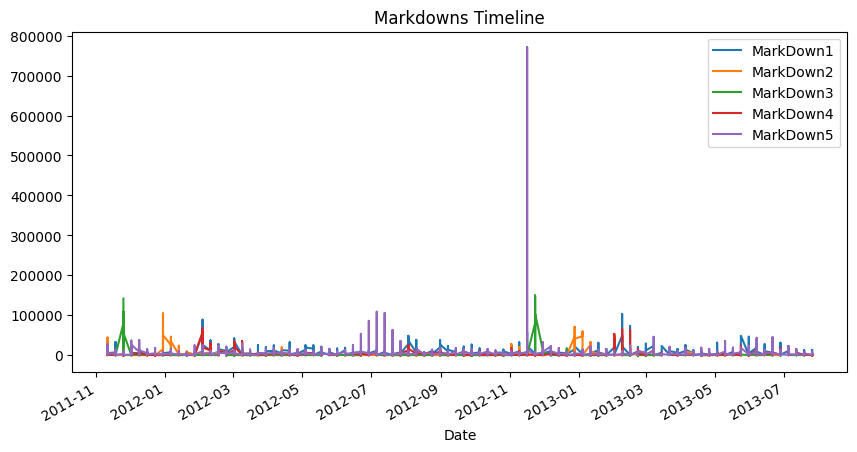

In [20]:
#initial visualisation timeline Markdowns line plot
df_features_T.plot(kind='line', x='Date', y=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], figsize=(10, 5), title='Markdowns Timeline')
plt.show()
# .plot(kind='line',x='year',y='AvgLevels', figsize=(5,5))

There appears to be a large outlier in Markdown5 in late 2012/early 2013.  
Code below finds timing of this value (16 Nov 2012)

However there is no sales data beyond 26 Oct 2012 so should not affect correlation analysis.

In [21]:
Markdown5Max = df_features_T['MarkDown5'].max()
df_features_T.loc[df_features_T['MarkDown5'] == Markdown5Max]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Monthno,MarkDownOn
5059,28,2012-11-16,49.39,3.834,10431.55,184.51,42.72,1422.57,771448.1,131.3258,10.199,False,2012,11,True


In [22]:
df_features_T.replace(Markdown5Max, np.nan, inplace=True)
# df_features_T.loc[df_features_T['MarkDown5'] == 'NaN']
df_features_T.loc[5059:5059]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Monthno,MarkDownOn
5059,28,2012-11-16,49.39,3.834,10431.55,184.51,42.72,1422.57,NaN,131.3258,10.199,False,2012,11,True


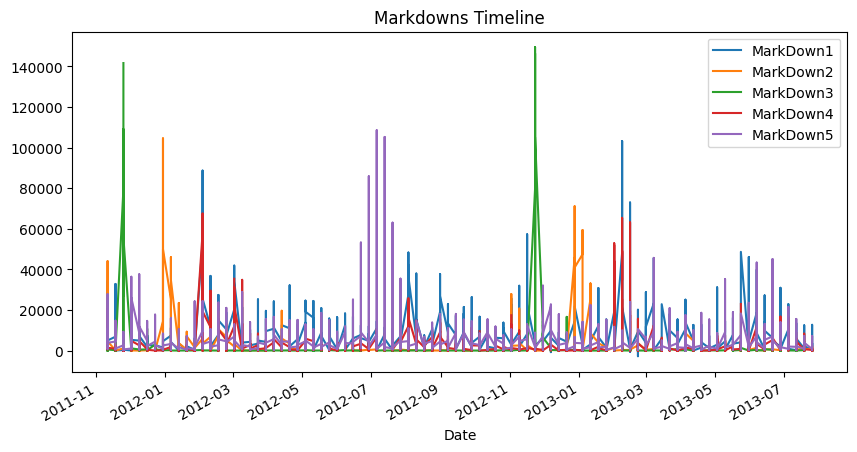

In [23]:
#initial visualisation timeline Markdowns line plot following removal of MarkDown5 outlier
df_features_T.plot(kind='line', x='Date', y=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], figsize=(10, 5), title='Markdowns Timeline')
plt.show()
# .plot(kind='line',x='year',y='AvgLevels', figsize=(5,5))

In [24]:
#re merge sales and features datasets having removed Markdown 5 outlier 
# outer join on Store and Data
# takes about 1min to run try not to run unless necessary
df_salesfeaturesmerged = (pd.merge(df_sales_T, df_features_T, how='outer', on=['Store', 'Date'])
                          .sort_values(by=['Date', 'Store', 'Dept'])
                            )

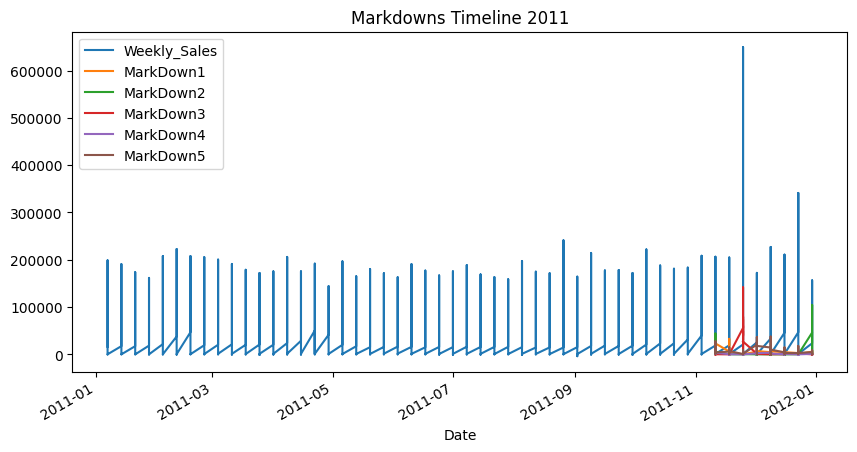

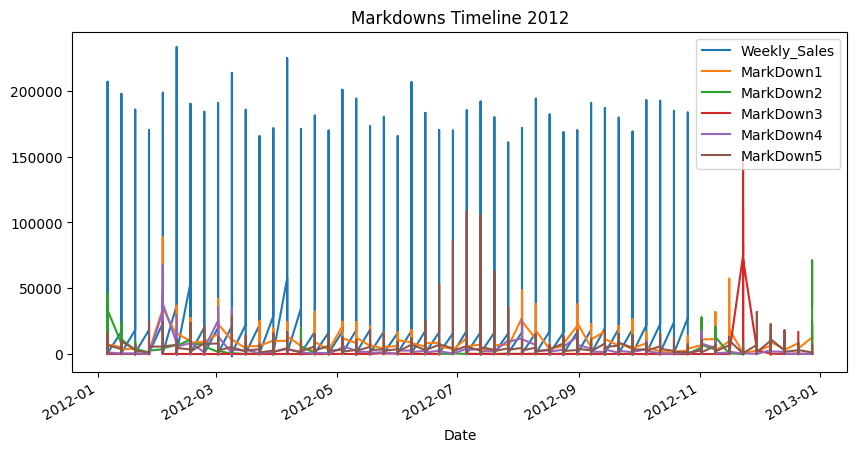

In [25]:
#salesfeaturemerged Markdowns and sales timeline plot from 2011 and 2012 
# the only years where sales and markdown datasets overlap
for y in [2011, 2012]:
    df_salesfeaturesmerged.query('Year==@y').plot(kind='line', x='Date', y=['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], figsize=(10, 5), title=f'Markdowns Timeline {y}')
    plt.show()

Compare correlation matrices for sales vs MarkDowns (expect same for 1-4 and probably for 5 due to no sales data on date of removed MarkDown5 outlier.)

In [26]:
#correlation of sales vs Markdowns only
    
years= df_salesfeaturesmerged['Year'].unique()
print (years)
for y in years:

    print()
    print(f'Sales v MarkDowns correlation matrix for {y}:')
    
    select_df=df_salesfeaturesmerged[df_salesfeaturesmerged['Year'] == y][
    ['Weekly_Sales', 'MarkDown1', 'MarkDown2','MarkDown3','MarkDown4','MarkDown5']
        ]
    SalesvMarkDown_correlation2=select_df.corr()
    print(SalesvMarkDown_correlation2)
    

[2010 2011 2012 2013]

Sales v MarkDowns correlation matrix for 2010:
              Weekly_Sales  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
Weekly_Sales           1.0        NaN        NaN        NaN        NaN   
MarkDown1              NaN        NaN        NaN        NaN        NaN   
MarkDown2              NaN        NaN        NaN        NaN        NaN   
MarkDown3              NaN        NaN        NaN        NaN        NaN   
MarkDown4              NaN        NaN        NaN        NaN        NaN   
MarkDown5              NaN        NaN        NaN        NaN        NaN   

              MarkDown5  
Weekly_Sales        NaN  
MarkDown1           NaN  
MarkDown2           NaN  
MarkDown3           NaN  
MarkDown4           NaN  
MarkDown5           NaN  

Sales v MarkDowns correlation matrix for 2011:
              Weekly_Sales  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
Weekly_Sales      1.000000   0.046927  -0.006026   0.096027   0.018197   
MarkDown1         0.046927   1.00

As I expected, sales vs Markdowns correlation is same as before.  I cannot see any significant correlation between weekly sales and any of the 5 Markdown values.

In [27]:
#2011 vs 2012 total and total store sales
print ("2011 vs 2012 total of weekly sales data")
print(df_salesfeaturesmerged
    [(df_salesfeaturesmerged['Year'] == 2011) | (df_salesfeaturesmerged['Year'] == 2012)]
    .groupby(['Year'])['Weekly_Sales'].sum()/1000000
)
print()

print ("total of weekly sales in Feb-Oct 2011 and Feb-Oct 2012")
print(df_salesfeaturesmerged
    [((df_salesfeaturesmerged['Year'] == 2011) | (df_salesfeaturesmerged['Year'] == 2012))
     & (df_salesfeaturesmerged['Monthno'] >= 2) & (df_salesfeaturesmerged['Monthno'] <= 11)]
    .groupby(['Year'])['Weekly_Sales'].sum()/1000000
)
print()

print ("total of weekly sales in Feb-Oct 2011 and Feb-Oct 2012 by store")
(df_salesfeaturesmerged[
    ((df_salesfeaturesmerged['Year'] == 2011) | (df_salesfeaturesmerged['Year'] == 2012))
    & (df_salesfeaturesmerged['Monthno'] >= 2) & (df_salesfeaturesmerged['Monthno'] <= 11)]
    .groupby(['Store','Year',])['Weekly_Sales'].sum()/1000000).unstack()


2011 vs 2012 total of weekly sales data
Year
2011    2448.200007
2012    2000.132859
Name: Weekly_Sales, dtype: float64

total of weekly sales in Feb-Oct 2011 and Feb-Oct 2012
Year
2011    1996.417938
2012    1831.238388
Name: Weekly_Sales, dtype: float64

total of weekly sales in Feb-Oct 2011 and Feb-Oct 2012 by store


Year,2011,2012
Store,,
1,66.409273,62.478367
2,79.882046,74.579774
3,16.928024,16.543486
4,90.518833,84.847928
5,13.438057,12.981807
6,65.454513,60.933598
7,24.577554,22.941523
8,38.747635,35.952012
9,23.415205,22.016898


As data begins in Feb 2011 and ends in Oct 2012, need to compare Feb-Oct for both years.

In Feb-Oct 2012, total sales were down across the business and for most but not all stores (e.g. store 38)for same period in 2011.

In [28]:
#merge sales_features dataset with stores dataset outer join on Store

# takes about 1min to run try not to run unless necessary
df_salesfeaturesstoresmerged = (pd.merge(df_salesfeaturesmerged, df_stores_T, how='outer', on=['Store'])
                          .sort_values(by=['Date','Store', 'Dept'])
                            )
print(df_salesfeaturesstoresmerged)

        Store  Dept       Date  Weekly_Sales IsHoliday_x  Temperature  \
0           1   1.0 2010-02-05      24924.50       False        42.31   
1           1   2.0 2010-02-05      50605.27       False        42.31   
2           1   3.0 2010-02-05      13740.12       False        42.31   
3           1   4.0 2010-02-05      39954.04       False        42.31   
4           1   5.0 2010-02-05      32229.38       False        42.31   
...       ...   ...        ...           ...         ...          ...   
392658     41   NaN 2013-07-26           NaN         NaN        67.56   
399650     42   NaN 2013-07-26           NaN         NaN        83.32   
406440     43   NaN 2013-07-26           NaN         NaN        79.13   
413648     44   NaN 2013-07-26           NaN         NaN        83.62   
423324     45   NaN 2013-07-26           NaN         NaN        76.06   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...  MarkDown5  \
0            2.572        NaN        NaN        NaN 

In [29]:
#2011 vs 2012 store type sales
(df_salesfeaturesstoresmerged[
    (df_salesfeaturesstoresmerged['Year'] == 2011) | (df_salesfeaturesstoresmerged['Year'] == 2012)]
    .groupby(['Type', 'Year'])['Weekly_Sales'].sum()/1000000).unstack()

Year,2011,2012
Type,,
A,1578.207911,1287.376394
B,724.119001,586.604000
C,145.873095,126.152466


        Store  Dept       Date  Weekly_Sales IsHoliday_x  Temperature  \
3729        1   1.0 2011-02-04      21665.76       False        42.27   
3730        1   2.0 2011-02-04      46829.12       False        42.27   
3731        1   3.0 2011-02-04      11012.52       False        42.27   
3732        1   4.0 2011-02-04      35870.49       False        42.27   
3733        1   5.0 2011-02-04      31280.62       False        42.27   
...       ...   ...        ...           ...         ...          ...   
423281     45  93.0 2012-10-26       2487.80       False        58.85   
423282     45  94.0 2012-10-26       5203.31       False        58.85   
423283     45  95.0 2012-10-26      56017.47       False        58.85   
423284     45  97.0 2012-10-26       6817.48       False        58.85   
423285     45  98.0 2012-10-26       1076.80       False        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
3729         2.989        NaN        NaN      

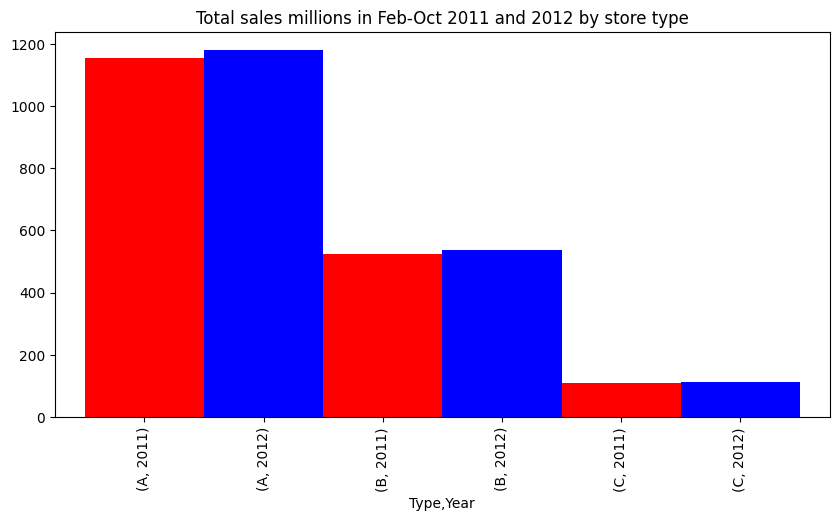

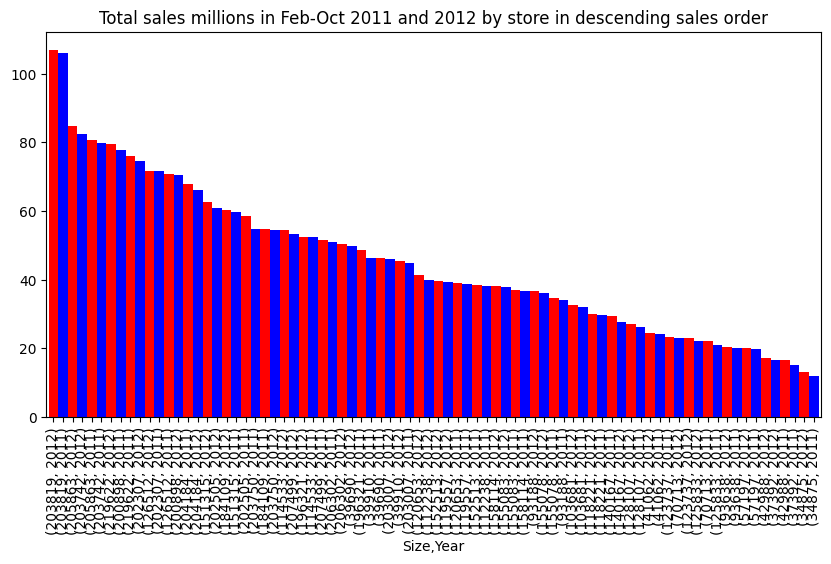

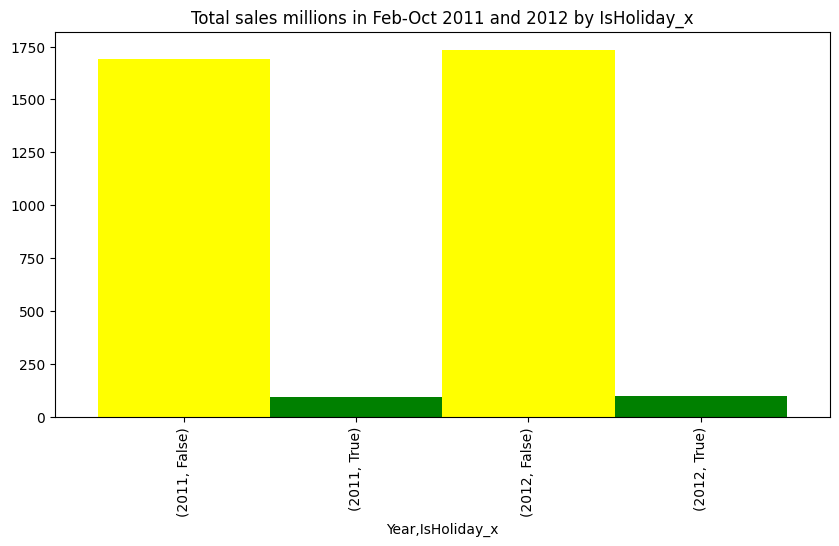

I believe IsHoliday_x comes from sales dataset


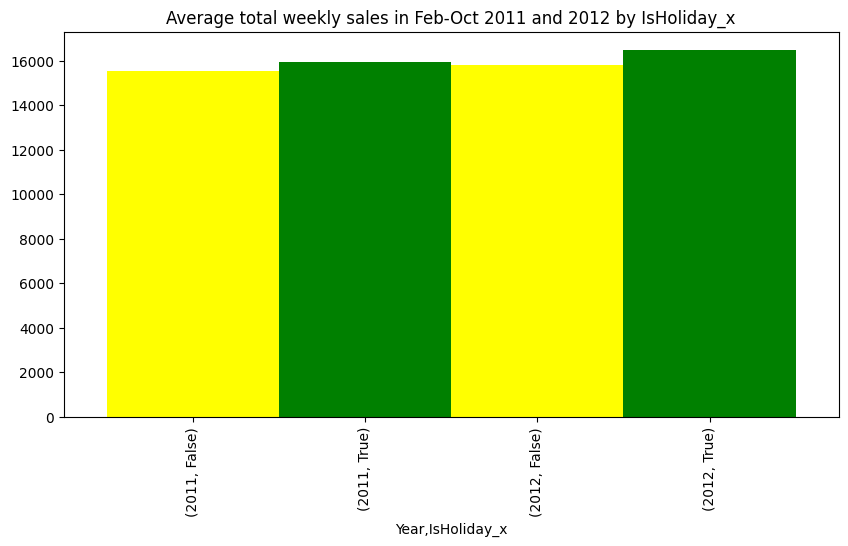

I believe IsHoliday_x comes from sales dataset


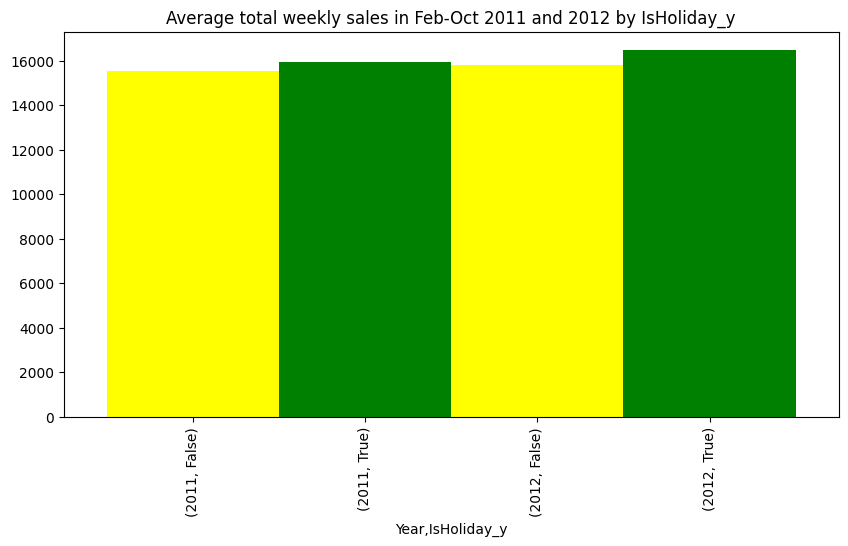

I believe IsHoliday_y comes from salesfeatures dataset


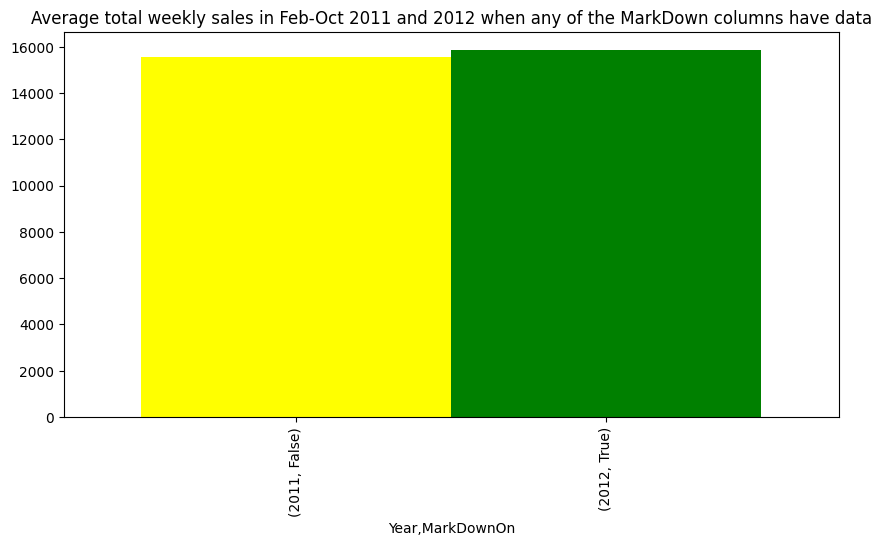

In [30]:
df_feb11oct12 = df_salesfeaturesstoresmerged.copy()
df_feb11oct12 = df_feb11oct12.query(
    ('Year >= 2011 and Year <= 2012 and Monthno >= 2 and Monthno <= 10')
    ).sort_values(by=['Date','Store','Dept'])
pd.set_option('display.max_columns',21)
print(df_feb11oct12)

salestimelinechartdata=(df_feb11oct12.groupby(['Type', 'Year'])['Weekly_Sales'].sum())/1000000

salestimelinechartdata.plot(
    kind='bar', figsize=(10, 5),color=['red', 'blue'], width=1,
    title='Total sales millions in Feb-Oct 2011 and 2012 by store type')
plt.show()


salestimelinechartdata=(df_feb11oct12.groupby(['Size', 'Year'])['Weekly_Sales'].sum()/1000000
).sort_values(ascending=False)
salestimelinechartdata.plot(
    kind='bar', figsize=(10, 5), color=['red', 'blue'], width=1,
    title='Total sales millions in Feb-Oct 2011 and 2012 by store in descending sales order')
plt.show()


salestimelinechartdata=(df_feb11oct12.groupby(['Year', 'IsHoliday_x'])['Weekly_Sales'].sum()/1000000
)
salestimelinechartdata.plot(
    kind='bar', figsize=(10, 5), color=['yellow', 'green'], width=1,
    title='Total sales millions in Feb-Oct 2011 and 2012 by IsHoliday_x')
plt.show()
print('I believe IsHoliday_x comes from sales dataset')

salestimelinechartdata=(df_feb11oct12.groupby(['Year', 'IsHoliday_x'])['Weekly_Sales'].mean()
)
salestimelinechartdata.plot(
    kind='bar', figsize=(10, 5), color=['yellow', 'green'], width=1,
    title='Average total weekly sales in Feb-Oct 2011 and 2012 by IsHoliday_x')
plt.show()
print('I believe IsHoliday_x comes from sales dataset')

salestimelinechartdata=(df_feb11oct12.groupby(['Year', 'IsHoliday_y'])['Weekly_Sales'].mean()
)
salestimelinechartdata.plot(
    kind='bar', figsize=(10, 5), color=['yellow', 'green'], width=1,
    title='Average total weekly sales in Feb-Oct 2011 and 2012 by IsHoliday_y')
plt.show()
print('I believe IsHoliday_y comes from salesfeatures dataset')


salestimelinechartdata=(df_feb11oct12.groupby(['Year', 'MarkDownOn'])['Weekly_Sales'].mean()
)
salestimelinechartdata.plot(
    kind='bar', figsize=(10, 5), color=['yellow', 'green'], width=1,
    title='Average total weekly sales in Feb-Oct 2011 and 2012 when any of the MarkDown columns have data')

plt.show()


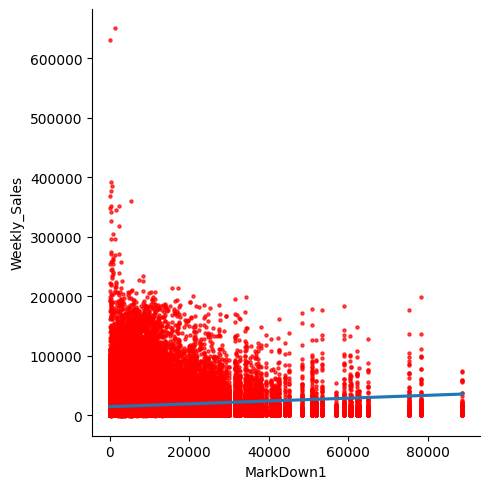

In [31]:
# for col in ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']:
for col in ['MarkDown1']:
   # sns.lmplot(data=df_salesfeaturesstoresmerged, x=col, y="Weekly_Sales", scatter_kws={"s": 50})
   # plt.show()

   sns.lmplot(
    x=col, 
    y="Weekly_Sales", 
    data=df_salesfeaturesstoresmerged, 
    scatter_kws={"s": 5, "alpha": 0.7, "color": "red"}
)

This shows that there is a very slight increase in sales during holiday periods but does not look significant.

Replace MarkDown NaN values with zeros and recorrelate

In [32]:
df_salesfeaturesstoresmerged['MarkDown1'].replace(np.nan, 0,inplace=True)
df_salesfeaturesstoresmerged['MarkDown2'].replace(np.nan, 0,inplace=True)
df_salesfeaturesstoresmerged['MarkDown3'].replace(np.nan, 0,inplace=True)
df_salesfeaturesstoresmerged['MarkDown4'].replace(np.nan, 0,inplace=True)
df_salesfeaturesstoresmerged['MarkDown5'].replace(np.nan, 0,inplace=True)
df_salesfeaturesstoresmerged

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Year,Monthno,MarkDownOn,Type,Size,totalsales_millions
0,1,1.0,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,2010,2,False,A,151315,NaN
1,1,2.0,2010-02-05,50605.27,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,2010,2,False,A,151315,NaN
2,1,3.0,2010-02-05,13740.12,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,2010,2,False,A,151315,NaN
3,1,4.0,2010-02-05,39954.04,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,2010,2,False,A,151315,NaN
4,1,5.0,2010-02-05,32229.38,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,2010,2,False,A,151315,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392658,41,NaN,2013-07-26,NaN,NaN,67.56,3.582,497.67,1454.29,6.30,4.00,2418.00,NaN,NaN,False,2013,7,True,A,196321,137.870310
399650,42,NaN,2013-07-26,NaN,NaN,83.32,3.865,0.00,0.00,0.17,0.00,756.79,NaN,NaN,False,2013,7,True,C,39690,181.341935
406440,43,NaN,2013-07-26,NaN,NaN,79.13,3.620,43.37,0.00,1.18,0.00,531.35,NaN,NaN,False,2013,7,True,C,41062,79.565752
413648,44,NaN,2013-07-26,NaN,NaN,83.62,3.669,134.31,0.00,1.00,0.00,199.75,NaN,NaN,False,2013,7,True,C,39910,90.565435


In [33]:
#correlation of sales vs Markdowns after replacing MarkDown column nulls with zeros.
    
years= df_salesfeaturesstoresmerged['Year'].unique()
print (years)
for y in years:

    print()
    print(f'Sales v MarkDowns correlation matrix for {y}:')
    
    select_df=df_salesfeaturesstoresmerged[df_salesfeaturesstoresmerged['Year'] == y][
    ['Weekly_Sales', 'MarkDown1', 'MarkDown2','MarkDown3','MarkDown4','MarkDown5']
        ]
    SalesvMarkDown_correlation3=select_df.corr()
    print(SalesvMarkDown_correlation3)

[2010 2011 2012 2013]

Sales v MarkDowns correlation matrix for 2010:
              Weekly_Sales  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
Weekly_Sales           1.0        NaN        NaN        NaN        NaN   
MarkDown1              NaN        NaN        NaN        NaN        NaN   
MarkDown2              NaN        NaN        NaN        NaN        NaN   
MarkDown3              NaN        NaN        NaN        NaN        NaN   
MarkDown4              NaN        NaN        NaN        NaN        NaN   
MarkDown5              NaN        NaN        NaN        NaN        NaN   

              MarkDown5  
Weekly_Sales        NaN  
MarkDown1           NaN  
MarkDown2           NaN  
MarkDown3           NaN  
MarkDown4           NaN  
MarkDown5           NaN  

Sales v MarkDowns correlation matrix for 2011:
              Weekly_Sales  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
Weekly_Sales      1.000000   0.051923   0.023009   0.063306   0.046460   
MarkDown1         0.051923   1.00

Even with null correlations replaced with zeros, correlations are still very weak between the values in the sales and MarkDown columns.

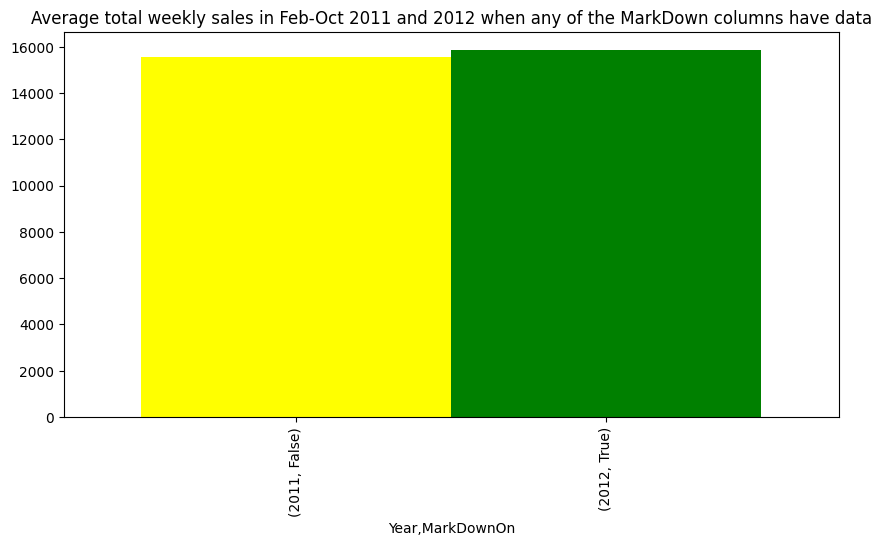

In [34]:
#salesfeaturemerged Markdowns and sales timeline plot from 2011 and 2012 
# the only years where sales and markdown datasets overlap
salestimelinechartdata=(df_feb11oct12.groupby(['Year', 'MarkDownOn'])['Weekly_Sales'].mean()
)
salestimelinechartdata.plot(
    kind='bar', figsize=(10, 5), color=['yellow', 'green'], width=1,
    title='Average total weekly sales in Feb-Oct 2011 and 2012 when any of the MarkDown columns have data')

plt.show()

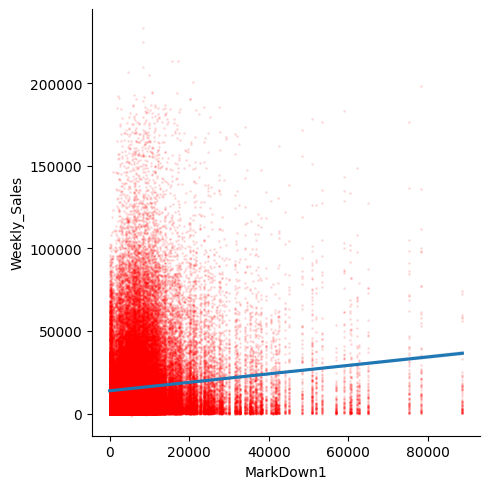

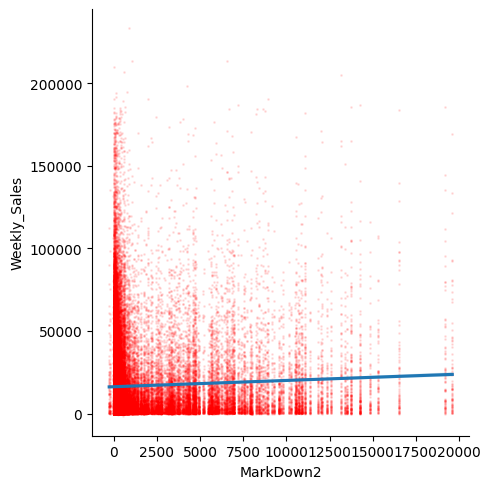

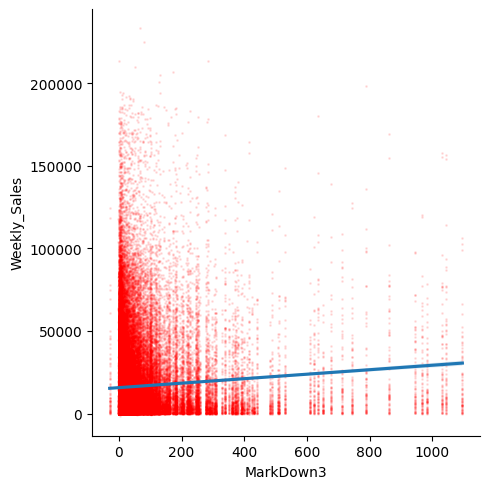

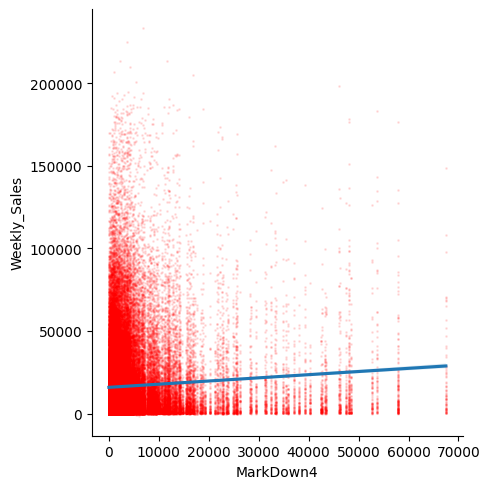

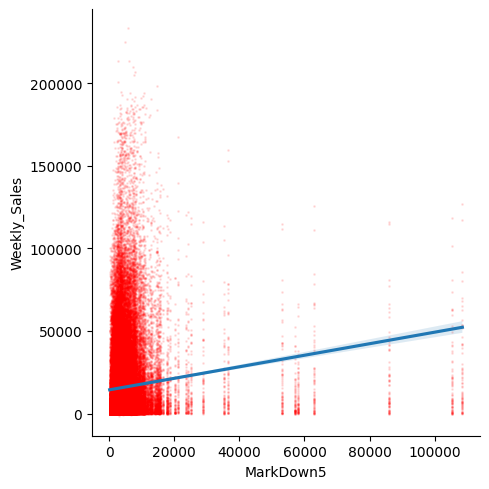

In [35]:
for col in ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']:
    sns.lmplot(
    x=col, 
    y="Weekly_Sales", 
    data=df_feb11oct12,
    scatter_kws={"s": 1, "alpha": 0.1, "color": "red"}
)

I can't see any clear correlation of sales vs Markdowns.  The lines suggest a slight positivce correlation as was seen in the correlation matrices but it is very difficult to see this visually due to the high volume of data and overlapping scatter points which are highly concentrated at the lower end of the Markdown ranges.

---